<a href="https://colab.research.google.com/github/lmcanavals/machine_learning/blob/main/0601_kmeans_from_scratch_naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import heapq
import matplotlib.pyplot as plt

In [ ]:
def eucli(p1, p2):
    return sum((p1 - p2)**2)**0.5

assert eucli(np.array([0, 3]), np.array([4, 0])) == 5.
assert eucli(np.array([0, 0, 0]), np.array([1, 1, 1])) == 3**0.5

In [ ]:
class MyKMeans:
    def __init__(self, k, random_state=42, dist=eucli):
        self.k = k
        self.dist = dist
        random.seed(random_state)
        np.random.seed(random_state)

    def fit(self, X):
        m, n = X.shape
        cx = np.random.rand(self.k, n)
        y = np.zeros((m))
        deltas = np.array([float('inf')]*self.k)
        while (deltas != 0.0).any():
            for i, p in enumerate(X):
                mindist = float('inf')
                minidx = -1
                for j in range(self.k):
                    curdist = self.dist(p, cx[j])
                    if curdist < mindist:
                        minidx = j
                        mindist = curdist
                y[i] = minidx
            temp = cx.copy()
            for j in range(self.k):
                cx[j] = np.mean(X[y==j], axis=0)
                deltas[j] = self.dist(temp[j], cx[j])
        self.centroids = cx
        self.labels = y


In [ ]:
m = 1000
X = np.random.rand(m, 3)

In [ ]:
model = MyKMeans(k=3)
model.fit(X)

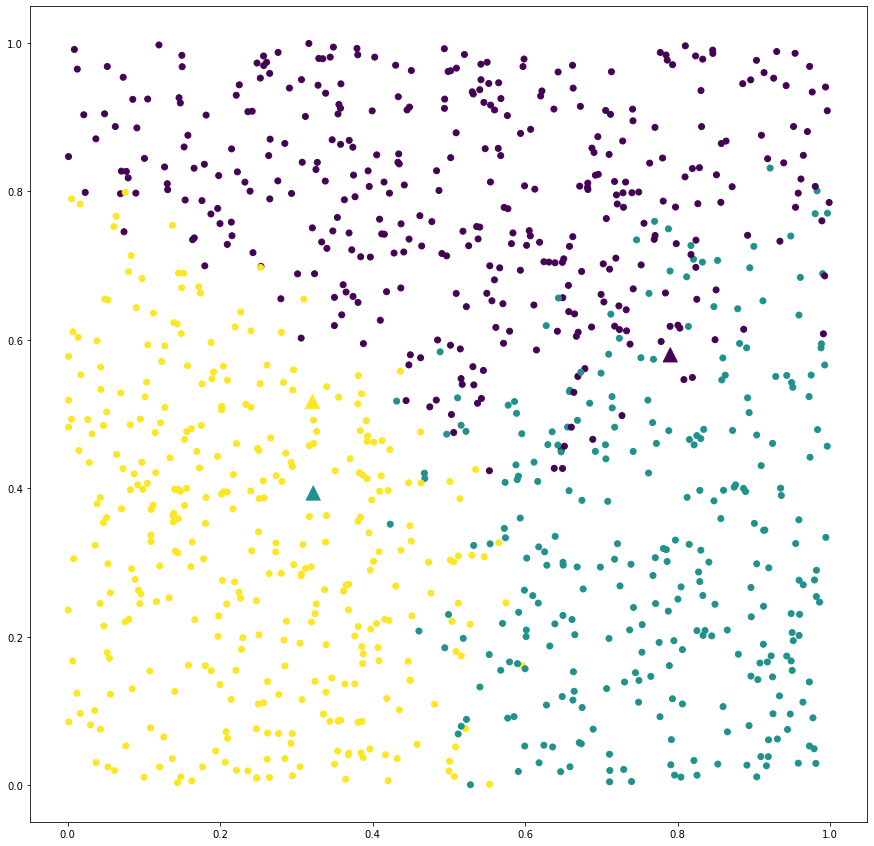

In [ ]:
plt.subplots(figsize=(15, 15))
plt.scatter(X[:, 0], X[:, 1], c=model.labels)
centroids = model.centroids
plt.scatter(centroids[:, 1], centroids[:, 2], marker='^', s=200, c=[1, 2, 3])

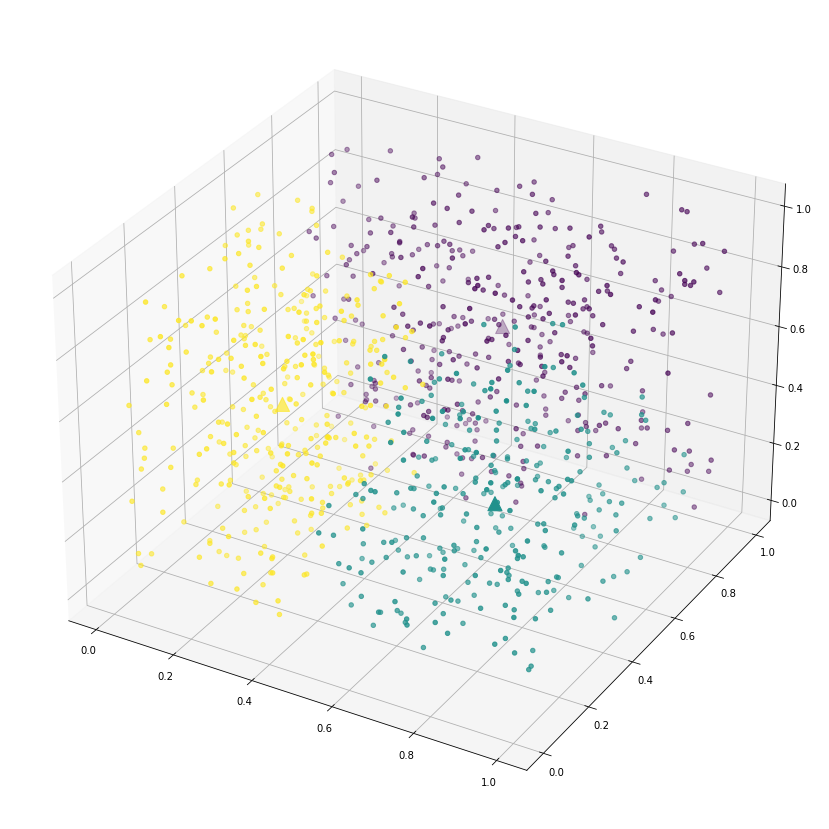

In [ ]:
fig = plt.figure(figsize=(15, 15), )
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=model.labels)
centroids = model.centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='^', s=200, c=[1, 2, 3])